In [10]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
#Pull XRT (Retail ETF) data
ticker = "XRT" 
start= "2018-01-01" 
end= "2021-02-01"

retail = yf.download(ticker, start=start, end=end, progress=False)
retail = retail.asfreq(freq='D').ffill().dropna()
retail.to_csv('resources/retail.csv')
retail.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,76.309998,82.510002,74.680000,76.180000,74.993279,10696600.0
2021-01-26,77.300003,81.650002,76.519997,81.430000,80.161491,9759000.0
2021-01-27,89.889999,93.480003,85.279999,91.230003,89.808830,32745900.0
2021-01-28,86.739998,99.239998,78.110001,82.970001,81.677505,31255100.0
2021-01-29,91.779999,93.480003,83.489998,88.010002,86.638985,11844600.0


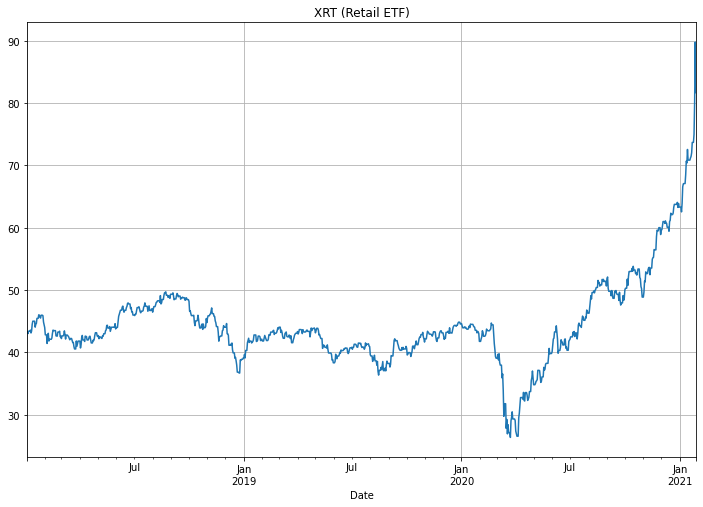

In [12]:
#Plot XRT historical prices
retail_plot = retail['Adj Close'].plot(figsize=(12,8), title='XRT (Retail ETF)', grid=True)

In [13]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2021-02-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,3851.679932,3859.229980,3797.159912,3855.360107,3855.360107,6.955860e+09
2021-01-26,3862.959961,3870.899902,3847.780029,3849.620117,3849.620117,6.029090e+09
2021-01-27,3836.830078,3836.830078,3732.479980,3750.770020,3750.770020,9.878040e+09
2021-01-28,3755.750000,3830.500000,3755.750000,3787.379883,3787.379883,6.937960e+09
2021-01-29,3778.050049,3778.050049,3694.120117,3714.239990,3714.239990,6.612570e+09


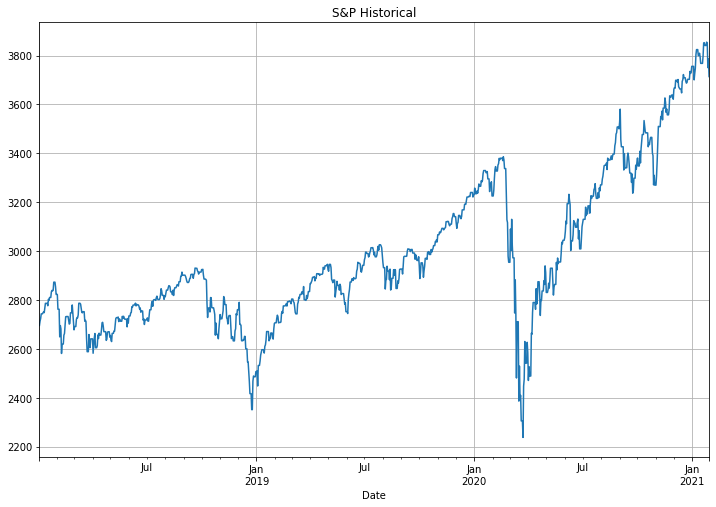

In [14]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(12,8), title='S&P Historical', grid=True)

In [15]:
#Calculate XRT percent change and 200-day rolling average
retail_percent_change = retail['Adj Close'].pct_change()
retail_percent_change_rolling = retail_percent_change.rolling(window=200).mean()

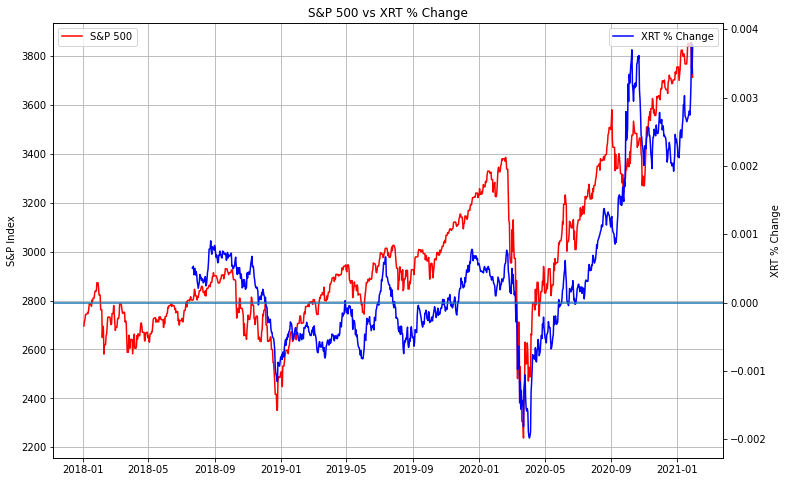

In [16]:
#Plot XRT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(retail_percent_change_rolling, label='XRT % Change', color='b')
ax.set_title('S&P 500 vs XRT % Change')
ax2.set_ylabel('XRT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper right')